In [2]:
import numpy as np
from pydrake.all import (
    ConstantVectorSource,
    DiagramBuilder,
    MeshcatVisualizer,
    MeshcatVisualizerParams,
    MultibodyPlant,
    Parser,
    PiecewisePolynomial,
    PiecewiseQuaternionSlerp,
    RigidTransform,
    RollPitchYaw,
    RotationMatrix,
    Simulator,
    Solve,
    StartMeshcat,
    TrajectorySource,
)
from pydrake.multibody import inverse_kinematics
from pydrake.trajectories import PiecewisePolynomial

from manipulation.meshcat_utils import AddMeshcatTriad
from manipulation.scenarios import AddMultibodyTriad, MakeManipulationStation
from manipulation.utils import running_as_notebook
from IPython.display import SVG, display
import pydot

In [3]:
# Start the visualizer.
meshcat = StartMeshcat()

INFO:drake:Meshcat listening for connections at http://localhost:7003


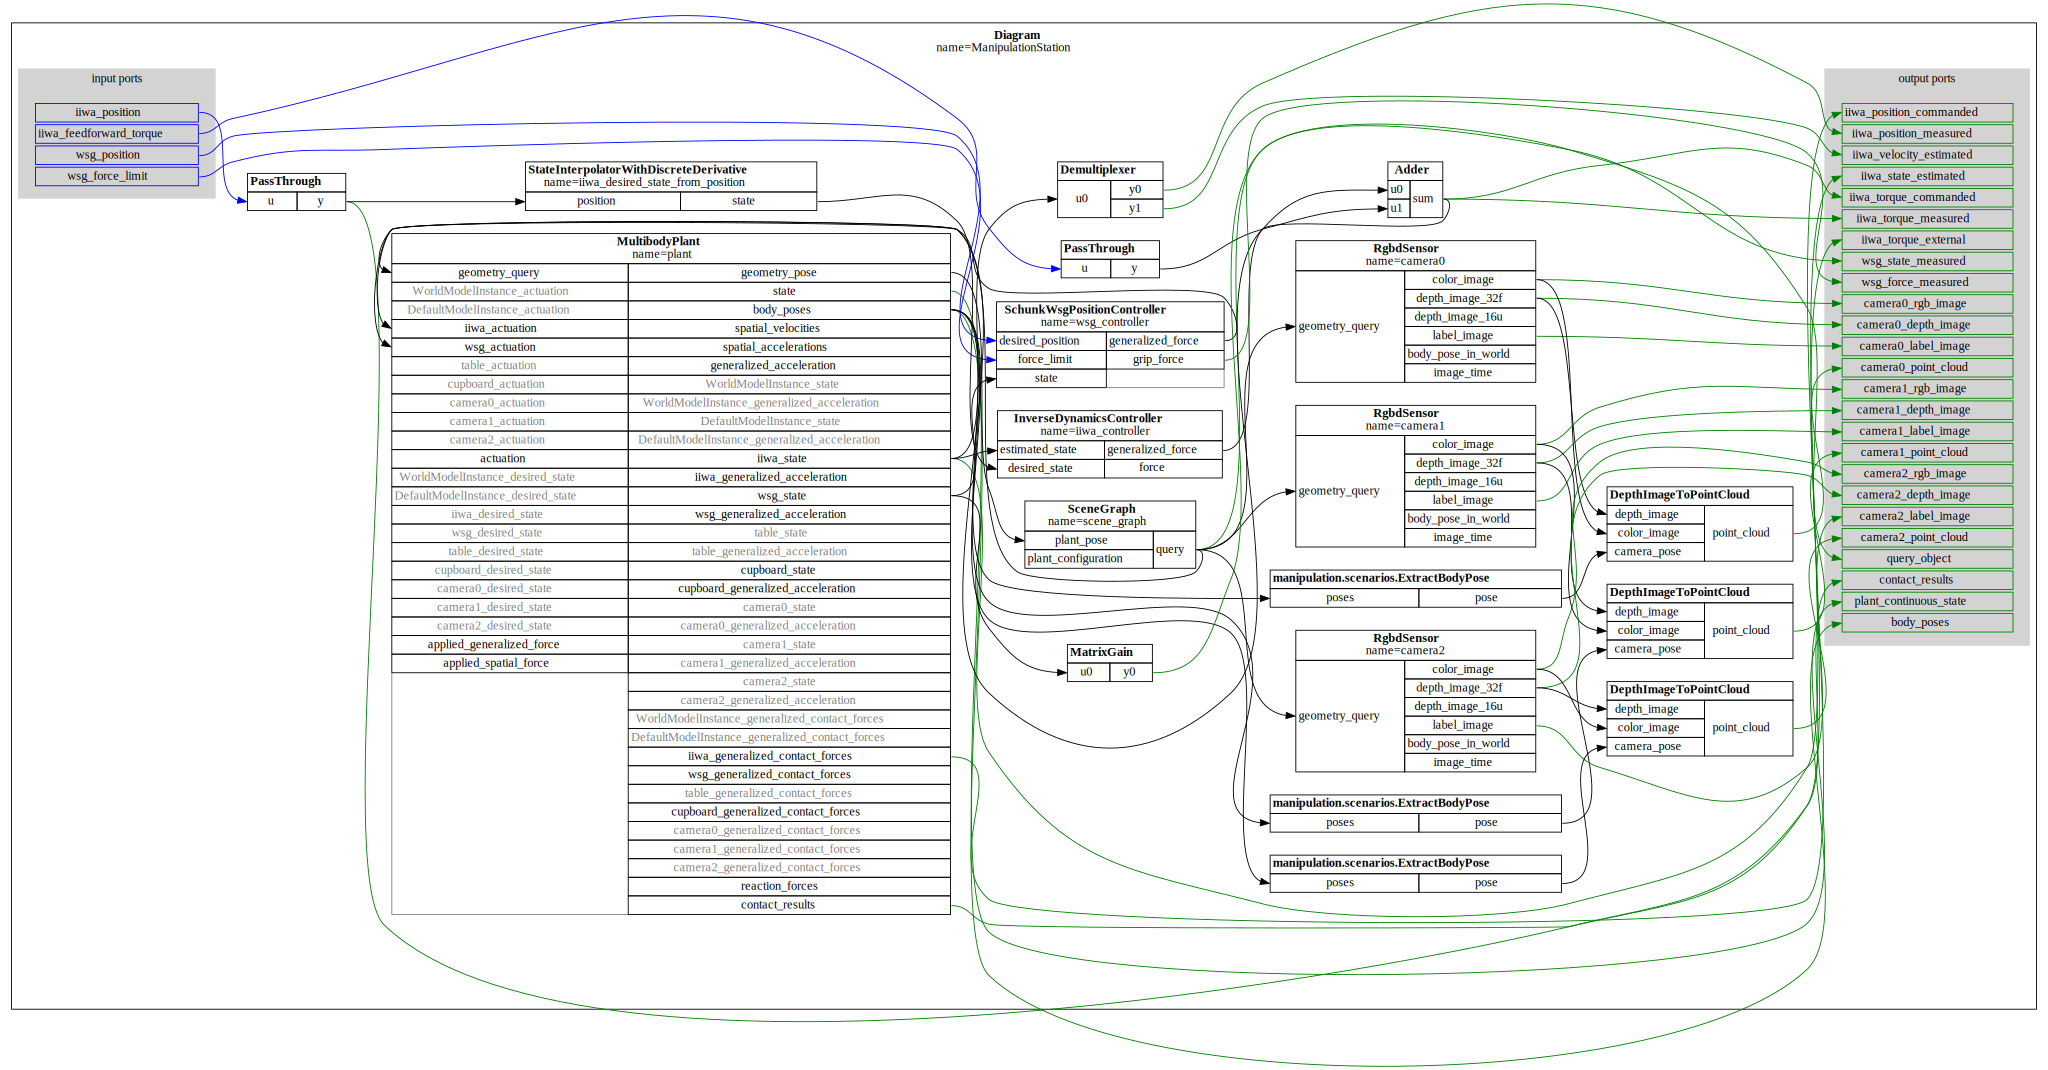

In [4]:
builder = DiagramBuilder()
station = builder.AddSystem(
    MakeManipulationStation(
        filename="package://manipulation/manipulation_station_with_cupboard.dmd.yaml",
        time_step=1e-3,
    )
)
plant = station.GetSubsystemByName("plant")
scene_graph = station.GetSubsystemByName("scene_graph")
AddMultibodyTriad(plant.GetFrameByName("body"), scene_graph)
display(
    SVG(
        pydot.graph_from_dot_data(station.GetGraphvizString(max_depth=1))[
            0
        ].create_svg()
    )
)